In [1]:
import numpy as np 
import pandas as pd

In [2]:
base_path = "data/output/"

In [3]:
nedbit_path = "nedbit_features.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665
1,cg00755661_CTTNBP2NL,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579
2,cg01343097_OR2M1P,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793
3,cg01833436_SDCCAG8,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
4,cg01833436_AKT3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0,1,3,2.982511,1.573376e+02,0.000007,0.000155
11752,cg02073054_IL19,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11753,cg02073054_IL19.1,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11754,cg05262634_CDCA8,0,2,3,2.987049,1.558967e+02,0.000007,0.000422


In [4]:
df_test_probe_genes = pd.read_csv("../graph_neural_networks/data/output/test_probe_genes.csv", sep="\t")
probe_gene_list = df_test_probe_genes.iloc[:, 0].tolist()
df_test_probe_genes, len(probe_gene_list), probe_gene_list[:5]

(                       0
 0       cg06151744_P2RX5
 1        cg04258457_ERN1
 2       cg01949993_LAMC2
 3      cg02385474_PCNXL2
 4     cg03041808_EDARADD
 ...                  ...
 2699    cg04423622_KIF17
 2700    cg00251536_KIF2C
 2701  cg07139449_SIPA1L1
 2702    cg02341811_PYGO2
 2703    cg00257659_LAMB3
 
 [2704 rows x 1 columns],
 2704,
 ['cg06151744_P2RX5',
  'cg04258457_ERN1',
  'cg01949993_LAMC2',
  'cg02385474_PCNXL2',
  'cg03041808_EDARADD'])

In [5]:
df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
df_nebit_features_test.reset_index(drop=True, inplace=True)
df_nebit_features_test

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2281.6360,0.352461,0.227665
1,cg03138364_PBX1,1,4234,1,0.551498,3209.4320,2.213691,0.227113
2,cg05365320_KIF21B,1,4324,1,0.906095,2283.7480,0.355691,0.227311
3,cg07344172_KIF21B,1,4330,1,0.906136,2283.1860,0.355144,0.227333
4,cg08732375_IGSF3,1,4092,1,0.596045,2970.6150,1.974394,0.227719
...,...,...,...,...,...,...,...,...
2699,cg01778345_GDAP2,0,5,3,2.990594,158.0601,0.000015,0.000882
2700,cg02642404_FAM36A,0,11,3,2.986049,157.9704,0.000049,0.002790
2701,cg00581848_GPR157,0,5,3,2.987783,162.6307,0.000027,0.001714
2702,cg05262634_CDCA8,0,2,3,2.987049,155.8967,0.000007,0.000422


In [6]:
probe_gene_list_ordered = df_nebit_features_test["name"].tolist()
len(probe_gene_list_ordered), probe_gene_list_ordered[:5]

(2704,
 ['cg00394221_FCRL1',
  'cg03138364_PBX1',
  'cg05365320_KIF21B',
  'cg07344172_KIF21B',
  'cg08732375_IGSF3'])

In [7]:
nebit_features = df_nebit_features_test.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,2281.6360,0.352461,0.227665
1,1,0.551498,3209.4320,2.213691,0.227113
2,1,0.906095,2283.7480,0.355691,0.227311
3,1,0.906136,2283.1860,0.355144,0.227333
4,1,0.596045,2970.6150,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,158.0601,0.000015,0.000882
2700,3,2.986049,157.9704,0.000049,0.002790
2701,3,2.987783,162.6307,0.000027,0.001714
2702,3,2.987049,155.8967,0.000007,0.000422


In [8]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

2704 (2704, 1)


array([[ 0.71491562],
       [ 2.09932726],
       [ 0.71806704],
       ...,
       [-2.44696008],
       [-2.45700822],
       [-2.44692889]])

In [9]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.714916,0.352461,0.227665
1,1,0.551498,2.099327,2.213691,0.227113
2,1,0.906095,0.718067,0.355691,0.227311
3,1,0.906136,0.717228,0.355144,0.227333
4,1,0.596045,1.742976,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882
2700,3,2.986049,-2.453914,0.000049,0.002790
2701,3,2.987783,-2.446960,0.000027,0.001714
2702,3,2.987049,-2.457008,0.000007,0.000422


In [10]:
output_gene_ranking_path = "out_gene_rankings.csv"
df_apu_labels = pd.read_csv(base_path + output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,0.832421,1
1,cg00755661_CTTNBP2NL,0.831663,1
2,cg01343097_OR2M1P,0.835457,1
3,cg01833436_SDCCAG8,0.834424,1
4,cg01833436_AKT3,0.834424,1
...,...,...,...
11751,cg01909024_PAQR7,-0.552101,5
11752,cg02073054_IL19,0.810015,1
11753,cg02073054_IL19.1,0.810015,1
11754,cg05262634_CDCA8,-0.552093,5


In [11]:
l_name = list()
l_labels = list()
for i, item in df_nebit_features_test.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg03138364_PBX1,1
2,cg05365320_KIF21B,1
3,cg07344172_KIF21B,1
4,cg08732375_IGSF3,1
...,...,...
2699,cg01778345_GDAP2,5
2700,cg02642404_FAM36A,5
2701,cg00581848_GPR157,5
2702,cg05262634_CDCA8,5


In [12]:
labels = df_labels["labels"].tolist()

In [13]:
import umap
#from umap import umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt

n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

#embeddings = umap.UMAP(n_neighbors=n_neighbors,
#                       min_dist=min_dist,
#                       metric='correlation').fit_transform(nebit_features)
embeddings = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='correlation').fit_transform(nebit_features)

#embeddings = umap.UMAP(metric='correlation').fit_transform(nebit_features)

/home/ubuntu/data/miniconda3/envs/nanodiag_biomarker/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-19 15:54:11.773495: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 15:54:13.908173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 15:54:13.908215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 15:54:14.107010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to regist

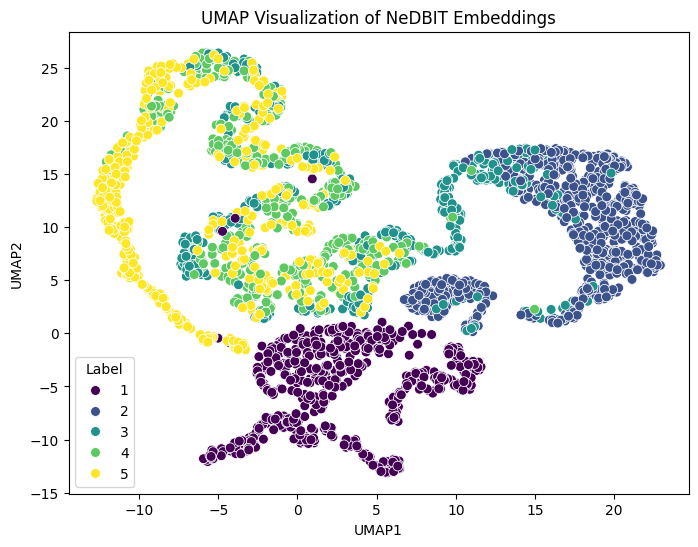

In [14]:
# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT Embeddings")
plt.savefig(base_path + "umap_NeDBIT_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
df_merged_signals = pd.read_csv("../process_illumina_arrays/data/output/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

In [ ]:
df_merged_signals["cg01550473_HSPA6"]

In [ ]:
feature_names = df_labels["feature_name"].tolist()

In [ ]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

In [ ]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

In [ ]:
dnam_signals_transpose.to_csv(base_path + "dnam_signals_transpose_test.csv")

In [ ]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

In [ ]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

In [ ]:
n_neighbors=35 #10 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [50]:
#nebit_features = nebit_features.reset_index()
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.714916,0.352461,0.227665
1,1,0.551498,2.099327,2.213691,0.227113
2,1,0.906095,0.718067,0.355691,0.227311
3,1,0.906136,0.717228,0.355144,0.227333
4,1,0.596045,1.742976,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882
2700,3,2.986049,-2.453914,0.000049,0.002790
2701,3,2.987783,-2.446960,0.000027,0.001714
2702,3,2.987049,-2.457008,0.000007,0.000422


In [51]:
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [52]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,0.739205,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,1,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,0.821238,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,1,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,0.874312,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,1,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,0.909598,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,0.447412,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,3,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,0.079514,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,3,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,0.102264,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,3,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [53]:
n_neighbors=20 #20 #10 #5
min_dist=0.999 #0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

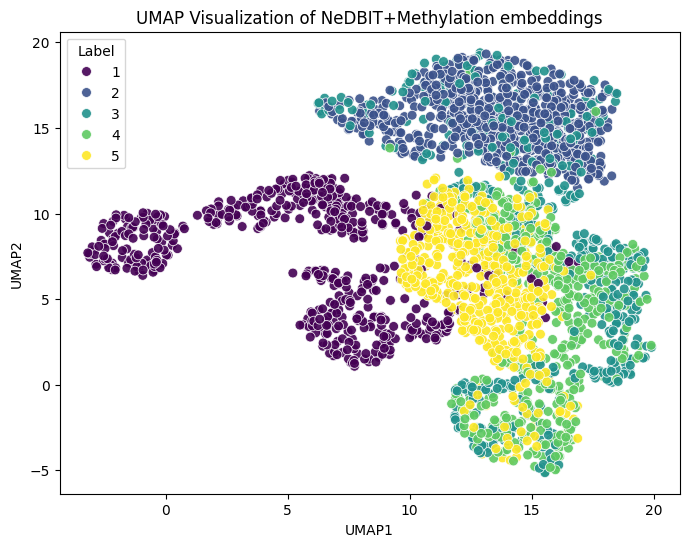

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [55]:
df_nebit_dnam_features = nebit_dnam_features

In [56]:
df_nebit_dnam_features["labels"] = labels
df_nebit_dnam_features["feature_names"] = df_labels["feature_name"].tolist()

In [57]:
file_path = base_path + "df_nebit_dnam_features_test.csv"
df_nebit_dnam_features.to_csv(file_path, sep="\t", header=None, index=None)
df_nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,26,27,28,29,30,31,32,33,labels,feature_names
0,1,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1,cg00394221_FCRL1
1,1,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,0.739205,...,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1,cg03138364_PBX1
2,1,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,0.821238,...,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1,cg05365320_KIF21B
3,1,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,0.874312,...,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1,cg07344172_KIF21B
4,1,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,0.909598,...,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1,cg08732375_IGSF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,0.447412,...,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5,cg01778345_GDAP2
2700,3,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,0.079514,...,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5,cg02642404_FAM36A
2701,3,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,0.102264,...,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5,cg00581848_GPR157
2702,3,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5,cg05262634_CDCA8


In [58]:
#feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
#feature_gene_names

In [59]:
#df_feature_names = pd.DataFrame(feature_gene_names)
#file_path = base_path + "df_feature_names.csv"
#df_feature_names.to_csv(file_path, sep="\t", index=None)
#df_feature_names

In [62]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "naipu_processed_data/only_positive_corr_data/"
base_plot_path = "plots/only_positive_corr_data/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
pred_labels = torch.load(base_path + "pred_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]
pred_labels = [int(item) + 1 for item in pred_labels]

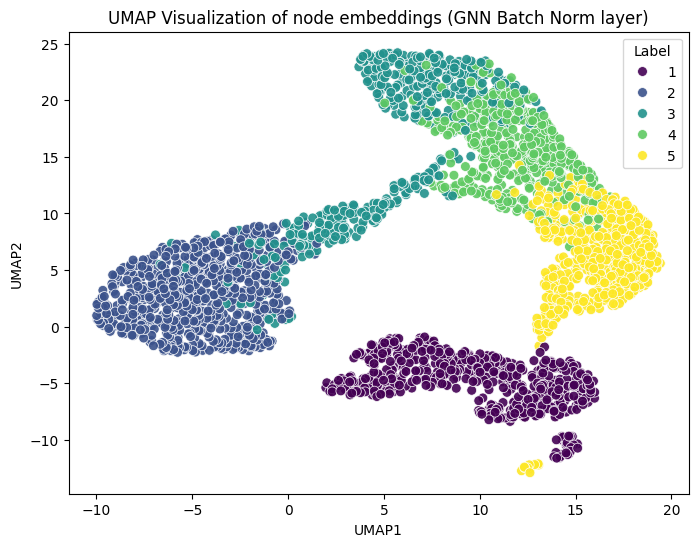

In [63]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN Batch Norm layer)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

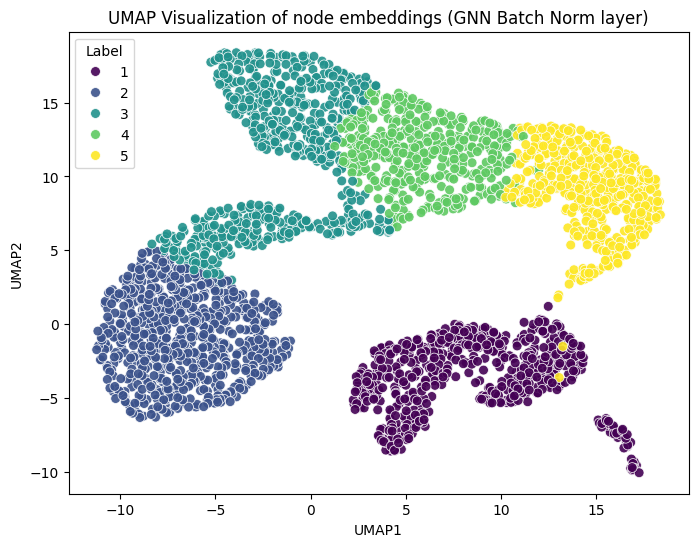

In [64]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": pred_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN Batch Norm layer)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}_{}.pdf".format(n_neighbors, min_dist, "pred_labels"))
plt.show()

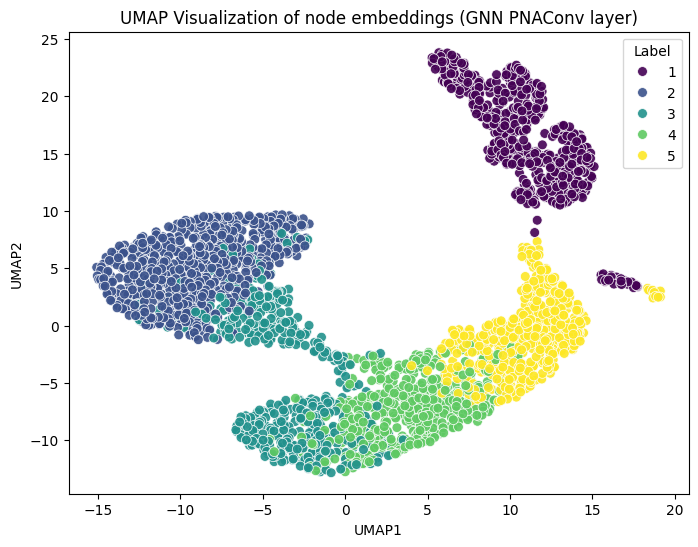

In [65]:
n_neighbors=35 #5
min_dist=0.999 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of node embeddings (GNN PNAConv layer)")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [66]:
#df_output_gene_rankings = pd.read_csv(base_path + "output_gene_ranking_only_positive_corr", sep="\t", header=None)
#df_output_gene_rankings = df_output_gene_rankings.sort_values(by=[0])
#df_output_gene_rankings.to_csv(base_path + "output_gene_ranking_only_positive_corr_sorted", index=None)
#df_output_gene_rankings

In [67]:
'''probes = dict()
for i, row in df_output_gene_rankings.iterrows():
    r_values = row.values[0].split(" ")
    name = r_values[0]
    p_name = name.split("_")[0]
    if p_name not in probes:
        probes[p_name] = 1
    else:
        probes[p_name] += 1'''

'probes = dict()\nfor i, row in df_output_gene_rankings.iterrows():\n    r_values = row.values[0].split(" ")\n    name = r_values[0]\n    p_name = name.split("_")[0]\n    if p_name not in probes:\n        probes[p_name] = 1\n    else:\n        probes[p_name] += 1'

In [68]:
#dict(sorted(probes.items(), key=lambda item: item[1], reverse=True))

In [69]:
import pandas as pd
import numpy as np

path = "naipu_processed_data/only_positive_corr_data/"
df_test_data = pd.read_csv(path + "df_nebit_dnam_features_test.csv", sep="\t", header=None)
df_test_data

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1,cg00394221_FCRL1
1,1,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,0.739205,...,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1,cg03138364_PBX1
2,1,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,0.821238,...,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1,cg05365320_KIF21B
3,1,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,0.874312,...,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1,cg07344172_KIF21B
4,1,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,0.909598,...,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1,cg08732375_IGSF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,0.447412,...,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5,cg01778345_GDAP2
2700,3,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,0.079514,...,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5,cg02642404_FAM36A
2701,3,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,0.102264,...,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5,cg00581848_GPR157
2702,3,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5,cg05262634_CDCA8


In [70]:
df_f_name_labels = df_test_data.loc[:, 39:]
df_f_name_labels["pred_labels"] = pred_labels
df_f_name_labels.columns = ["labels", "features", "pred_labels"]
df_f_name_labels

,labels,features,pred_labels
0,1,cg00394221_FCRL1,1
1,1,cg03138364_PBX1,1
2,1,cg05365320_KIF21B,1
3,1,cg07344172_KIF21B,1
4,1,cg08732375_IGSF3,1
...,...,...,...
2699,5,cg01778345_GDAP2,1
2700,5,cg02642404_FAM36A,5
2701,5,cg00581848_GPR157,1
2702,5,cg05262634_CDCA8,5


In [71]:
df_seeds = pd.read_csv(path + "seed_features.tsv", sep="\t", header=None)
df_seeds.columns = ["features", "association_scores"]
df_seeds

,features,association_scores
0,cg00394221_FCRL1,0.035990
1,cg00755661_CTTNBP2NL,0.043460
2,cg01343097_OR2M1P,0.186200
3,cg01523881_KIF21B,0.036170
4,cg01637011_KIF21B,0.036170
...,...,...
1753,cg00627846_FAM19A5,0.180439
1754,cg08550094_CECR5,0.264307
1755,cg19790884_C22orf34,0.261563
1756,cg23531285_POTEH,0.305018


In [72]:
pos_likely_pos = df_f_name_labels[df_f_name_labels["labels"].isin([1,2])]
pos_likely_pos

,labels,features,pred_labels
0,1,cg00394221_FCRL1,1
1,1,cg03138364_PBX1,1
2,1,cg05365320_KIF21B,1
3,1,cg07344172_KIF21B,1
4,1,cg08732375_IGSF3,1
...,...,...,...
2660,1,cg21594961_IL5RA,1
2670,1,cg09772954_GALNTL6,1
2676,1,cg03828494_ERN1,1
2686,1,cg23193730_ZNF140,1


In [73]:
pos_likely_pos_features = pos_likely_pos["features"].tolist()
df_seeds_as_positive = df_seeds[df_seeds["features"].isin(pos_likely_pos_features)]
df_seeds_as_positive

,features,association_scores
0,cg00394221_FCRL1,0.035990
3,cg01523881_KIF21B,0.036170
13,cg03138364_PBX1,0.269983
14,cg03701795_CD1E,0.047380
18,cg04860852_KIF21B,0.036170
...,...,...
1737,cg26136776_KLF1,0.061660
1740,cg27436184_APOC2,0.108820
1741,ch.19.1066737F_ANKRD27,0.063750
1743,cg12354729_ZFP64,0.240149


In [74]:
np.median(df_seeds_as_positive["association_scores"])

np.float64(0.06166)

In [75]:
negative_likely_negative = df_f_name_labels[df_f_name_labels["labels"].isin([3,4,5])]
negative_likely_negative

,labels,features,pred_labels
285,3,cg00001364_PROX1,3
296,3,cg00036599_C1orf54,3
297,3,cg00048381_ADAR,2
303,3,cg00067058_GPATCH3,2
316,3,cg00113315_SLC2A5,3
...,...,...,...
2699,5,cg01778345_GDAP2,1
2700,5,cg02642404_FAM36A,5
2701,5,cg00581848_GPR157,1
2702,5,cg05262634_CDCA8,5


In [76]:
negative_likely_negative_features = negative_likely_negative["features"].tolist()
df_seeds_as_negative = df_seeds[df_seeds["features"].isin(negative_likely_negative_features)]
df_seeds_as_negative

,features,association_scores


In [77]:
# likely positive
df_likely_positive = df_f_name_labels[df_f_name_labels["pred_labels"].isin([1]) & \
                                      df_f_name_labels["labels"].isin([5])]
df_likely_positive, len(df_likely_positive)

(      labels           features  pred_labels
 2541       5  cg00448707_DIRAS3            1
 2664       5   cg01809217_GREM2            1
 2681       5    cg00292669_RPA2            1
 2682       5    cg04438595_SPEN            1
 2684       5    cg03598513_STIL            1
 2694       5  cg01873305_MRPS15            1
 2696       5    cg00777895_SRP9            1
 2698       5   cg03969070_STK40            1
 2699       5   cg01778345_GDAP2            1
 2701       5  cg00581848_GPR157            1
 2703       5  cg03524755_FAM73A            1,
 11)

In [78]:
df_likely_positive_features = df_likely_positive["features"].tolist()
len(df_likely_positive_features), df_likely_positive_features[:5]

(11,
 ['cg00448707_DIRAS3',
  'cg01809217_GREM2',
  'cg00292669_RPA2',
  'cg04438595_SPEN',
  'cg03598513_STIL'])

In [79]:
df_seed_features = df_seeds["features"].tolist()
len(df_seed_features), df_seed_features[:5]

(1758,
 ['cg00394221_FCRL1',
  'cg00755661_CTTNBP2NL',
  'cg01343097_OR2M1P',
  'cg01523881_KIF21B',
  'cg01637011_KIF21B'])

In [80]:
likely_pos_in_seeds = list(set(df_seed_features).intersection(set(df_likely_positive_features)))
len(likely_pos_in_seeds), likely_pos_in_seeds[:5]

(0, [])

In [81]:
base_path = "../nanodiag_datasets/GSE175758/"
probe_mapper_full = pd.read_csv(base_path + "GPL13534-11288-mapper-HMBC450.txt", sep="\t")
probe_mapper_full

/tmp/ipykernel_81822/721186247.py:2: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  probe_mapper_full = pd.read_csv(base_path + "GPL13534-11288-mapper-HMBC450.txt", sep="\t")


,ID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,...,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,RANGE_START,RANGE_END,RANGE_GB,SPOT_ID
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,NaN,NaN,II,NaN,NaN,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,...,NaN,NaN,NaN,NaN,NaN,NaN,8553009.0,8553132.0,NC_000024.9,NaN
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,31717405.0,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,A,Red,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,...,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN,9363356.0,9363479.0,NC_000024.9,NaN
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,NaN,NaN,II,NaN,NaN,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,...,NaN,NaN,NaN,NaN,NaN,NaN,25314171.0,25314294.0,NC_000024.9,NaN
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,NaN,NaN,II,NaN,NaN,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,...,NaN,NaN,NaN,NaN,NaN,NaN,22741795.0,22741918.0,NC_000024.9,NaN
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,NaN,NaN,II,NaN,NaN,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,...,NaN,NaN,NaN,NaN,NaN,NaN,21664296.0,21664419.0,NC_000024.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,rs7746156,rs7746156,33622366,TACCAACCAATACTCAAAATAACCCATACTAATCTTCCTATTCTTC...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs7746156
485573,rs1945975,rs1945975,23614475,CCACTTCTCTTTCCTCACCTACTTTCATTTAATTTAATACTTACCT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs1945975
485574,rs966367,rs966367,16795360,ATAACTCCTTTAACTTTAAACACACATCTCTACACACAACCACATA...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs966367
485575,rs877309,rs877309,54760445,CCCCAACCCAAAACCTCTATAATTCACAAAACACAAATTCACACTT...,NaN,NaN,II,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs877309


In [82]:
pb = probe_mapper_full[probe_mapper_full["Name"] == "cg00861824"]

In [83]:
for item in pb.columns:
    print(item, pb[item])
    print("--")

ID 13648    cg00861824
Name: ID, dtype: object
--
Name 13648    cg00861824
Name: Name, dtype: object
--
AddressA_ID 13648    37728307
Name: AddressA_ID, dtype: int64
--
AlleleA_ProbeSeq 13648    AAATTTAATACATACTCAATATATTCCCTCAAAATTAAAAATATTA...
Name: AlleleA_ProbeSeq, dtype: object
--
AddressB_ID 13648   NaN
Name: AddressB_ID, dtype: float64
--
AlleleB_ProbeSeq 13648    NaN
Name: AlleleB_ProbeSeq, dtype: object
--
Infinium_Design_Type 13648    II
Name: Infinium_Design_Type, dtype: object
--
Next_Base 13648    NaN
Name: Next_Base, dtype: object
--
Color_Channel 13648    NaN
Name: Color_Channel, dtype: object
--
Forward_Sequence 13648    TAATATTACATGGATTTGATACATACTCAATGTATTCCCTCAAAAT...
Name: Forward_Sequence, dtype: object
--
Genome_Build 13648    37.0
Name: Genome_Build, dtype: float64
--
CHR 13648    1
Name: CHR, dtype: object
--
MAPINFO 13648    207963099.0
Name: MAPINFO, dtype: float64
--
SourceSeq 13648    CGGCCTAACACCCTCAATTTTGAGGGAATACATTGAGTATGTATCA...
Name: SourceSeq, dtype: ob

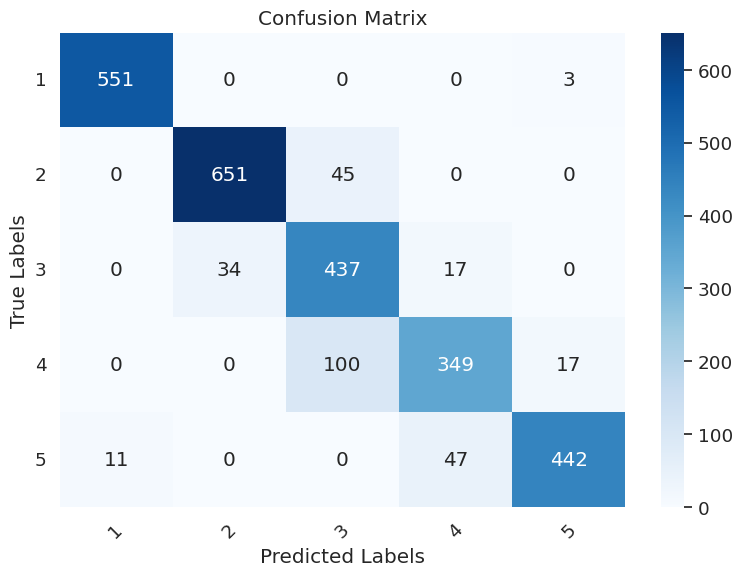

In [84]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score, \
RocCurveDisplay, average_precision_score, confusion_matrix

plot_local_path = base_plot_path #config["plot_local_path"]
n_edges = 2000000 #config["n_edges"]
n_epo = 3 #config["n_epo"]
classes = [1, 2, 3, 4, 5]
# Calculate confusion matrix
true_labels = df_f_name_labels["labels"].tolist()
predicted_labels = df_f_name_labels["pred_labels"].tolist()
cm = confusion_matrix(true_labels, predicted_labels)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
#plt.show()
plt.grid(True)
plt.savefig("Confusion_matrix_NPPI_{}_NEpochs_{}.pdf".format(n_edges, n_epo), dpi=200)

In [85]:
base_path = "naipu_processed_data/only_positive_corr_data/"
df_gene_gene_rel = pd.read_csv(base_path + "out_links_only_positive_corr", sep=" ", header=None)
df_gene_gene_rel

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
12097051,5150,4332
12097052,5150,5151
12097053,5150,5152
12097054,4332,4113


In [86]:
df_gene_gene_rel[(df_gene_gene_rel.loc[:, 0] == 10841) | (df_gene_gene_rel.loc[:, 1] == 10841)]

,0,1
179347,5425,10841
860430,9734,10841
1099121,10277,10841
1687040,5489,10841
1801376,10092,10841
1840571,11488,10841
3516549,9741,10841
4082594,7161,10841
4082610,7162,10841
4890991,5670,10841
